<a href="https://colab.research.google.com/github/Alinejj/Alinejj/blob/main/Natural_Disaster_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
import plotly.express as px
import folium
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import requests
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [6]:
#loading natural disaster dataset
disasters_dataset = pd.read_csv('/content/natural_disaster.csv')

In [7]:
#print first 5 rows
disasters_dataset.head()

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,...,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN


In [8]:
#number of rows and columns
disasters_dataset.shape

(16126, 45)

In [9]:
#statisctical measures of the data
disasters_dataset.describe()

,Year,Seq,Aid Contribution,Dis Mag Value,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI
count,16126.000000,16126.000000,6.770000e+02,4.946000e+03,16126.00000,15739.000000,12498.000000,16126.000000,15418.000000,12570.000000,1.141300e+04,3.895000e+03,9.220000e+03,2.430000e+03,1.161700e+04,1.096000e+03,5.245000e+03,15811.000000
mean,1996.764790,714.784820,1.254136e+05,4.735038e+04,1996.77837,6.444374,15.233957,1996.835607,6.576728,15.775020,2.842866e+03,2.621102e+03,8.823612e+05,7.329314e+04,7.165088e+05,7.986514e+05,7.247835e+05,63.215103
std,20.159065,1929.635089,2.997875e+06,3.094242e+05,20.15571,3.393965,8.953821,20.143010,3.352965,8.865486,6.860595e+04,3.440343e+04,8.573913e+06,5.230058e+05,7.718598e+06,3.057638e+06,4.723131e+06,26.734285
min,1900.000000,1.000000,1.000000e+00,-5.700000e+01,1900.00000,1.000000,1.000000,1900.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.400000e+01,2.000000e+00,3.221647
25%,1989.000000,93.000000,1.750000e+02,7.000000e+00,1989.00000,4.000000,7.000000,1989.000000,4.000000,8.000000,6.000000e+00,1.400000e+01,1.244750e+03,5.725000e+02,6.500000e+02,5.000000e+04,8.300000e+03,45.692897
50%,2001.000000,270.000000,7.210000e+02,1.515000e+02,2001.00000,7.000000,15.000000,2001.000000,7.000000,16.000000,2.000000e+01,5.000000e+01,1.000000e+04,3.000000e+03,5.965000e+03,1.725000e+05,6.000000e+04,68.415379
75%,2011.000000,486.000000,3.511000e+03,1.129650e+04,2011.00000,9.000000,23.000000,2011.000000,9.000000,23.000000,6.300000e+01,2.000000e+02,9.182300e+04,1.750000e+04,5.825500e+04,5.000000e+05,3.173000e+05,84.252733
max,2021.000000,9881.000000,7.800000e+07,1.302587e+07,2021.00000,12.000000,31.000000,2021.000000,12.000000,31.000000,3.700000e+06,1.800000e+06,3.300000e+08,1.585000e+07,3.300000e+08,6.000000e+07,2.100000e+08,100.000000


In [10]:
disasters_dataset.CPI.describe()

count    15811.000000
mean        63.215103
std         26.734285
min          3.221647
25%         45.692897
50%         68.415379
75%         84.252733
max        100.000000
Name: CPI, dtype: float64

In [11]:
disasters_dataset['CPI'].value_counts

<bound method IndexOpsMixin.value_counts of 0        3.221647
1        3.221647
2        3.350513
3        3.350513
4        3.350513
           ...   
16121         NaN
16122         NaN
16123         NaN
16124         NaN
16125         NaN
Name: CPI, Length: 16126, dtype: float64>

In [12]:
#handel non-numerical values
non_numerical_cols = disasters_dataset.select_dtypes(include=["object"]).columns
print(f"Non-numerical columns: {non_numerical_cols}")


Non-numerical columns: Index(['Glide', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type',
       'Disaster Subtype', 'Disaster Subsubtype', 'Event Name', 'Country',
       'ISO', 'Region', 'Continent', 'Location', 'Origin', 'Associated Dis',
       'Associated Dis2', 'OFDA Response', 'Appeal', 'Declaration',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')


In [ ]:
#drop non-numerical values
disasters_dataset.drop(non_numerical_cols, axis=1, inplace=True)

In [ ]:
#impute missing values
imputer = SimpleImputer(strategy="mean")
data_imputed = imputer.fit_transform(disasters_dataset)


In [24]:
# Update the non-numerical columns variable after dropping the non-numerical columns
non_numerical_cols = disasters_dataset.select_dtypes(include=["object"]).columns

# Initialize label encoder
le = LabelEncoder()

# Encode non-numerical columns if any
for col in non_numerical_cols:
    disasters_dataset[col] = le.fit_transform(disasters_dataset[col])

In [25]:
#KNN imputation
imputer = KNNImputer(n_neighbors=5)
data_imputed = imputer.fit_transform(disasters_dataset)

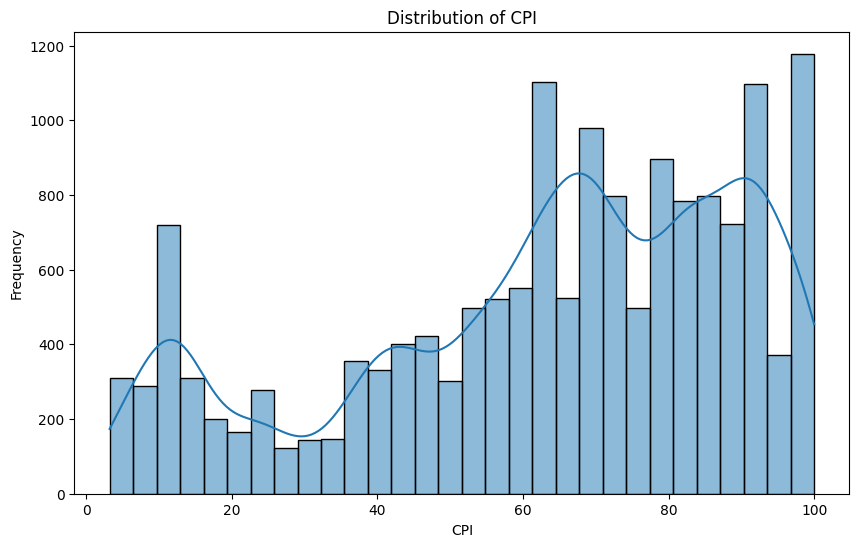

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(disasters_dataset['CPI'], bins=30, kde=True)
plt.title('Distribution of CPI')
plt.xlabel('CPI')
plt.ylabel('Frequency')
plt.show()


In [31]:
# Define features (X) and target (Y)
X = disasters_dataset.drop(columns='CPI').values
Y = disasters_dataset['CPI'].values


In [52]:
def create_dataset(X, Y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        v = X[i:(i + time_step)]
        Xs.append(v)
        ys.append(Y[i + time_step])
    return np.array(Xs), np.array(ys)

In [49]:
time_step = 1

In [34]:
X_lstm, Y_lstm = create_dataset(X, Y, time_step)



In [57]:
X_lstm = X_lstm.reshape((X_lstm.shape[0], X_lstm.shape[1], X_lstm.shape[2]))

In [36]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X_lstm, Y_lstm, test_size=0.2, random_state=2)


In [58]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [59]:
# Train the model
model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/50
404/404 [==============================] - 7s 7ms/step - loss: nan - val_loss: nan
Epoch 2/50
404/404 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 3/50
404/404 [==============================] - 3s 7ms/step - loss: nan - val_loss: nan
Epoch 4/50
404/404 [==============================] - 3s 7ms/step - loss: nan - val_loss: nan
Epoch 5/50
404/404 [==============================] - 2s 4ms/step - loss: nan - val_loss: nan
Epoch 6/50
404/404 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 7/50
404/404 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 8/50
404/404 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 9/50
404/404 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 10/50
404/404 [==============================] - 3s 7ms/step - loss: nan - val_loss: nan
Epoch 11/50
404/404 [==============================] - 2s 5

In [60]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Evaluate the model
train_score = model.evaluate(X_train, Y_train, verbose=0)
test_score = model.evaluate(X_test, Y_test, verbose=0)
print('Train Score: ', train_score)
print('Test Score: ', test_score)


101/101 [==============================] - 0s 2ms/step
Train Score:  nan
Test Score:  nan


In [61]:
X = disasters_dataset.drop(columns = 'CPI', axis = 1)
Y = disasters_dataset['CPI']


In [ ]:
print(X)

       Year   Seq  Aid Contribution  Dis Mag Value  Start Year  Start Month  \
0      1900  9002               NaN            NaN        1900          NaN   
1      1900  9001               NaN            NaN        1900          NaN   
2      1902    12               NaN            8.0        1902          4.0   
3      1902     3               NaN            NaN        1902          4.0   
4      1902    10               NaN            NaN        1902         10.0   
...     ...   ...               ...            ...         ...          ...   
16120  2021   270               NaN            NaN        2021          5.0   
16121  2021   449               NaN            NaN        2021          7.0   
16122  2021    75               NaN            NaN        2021          2.0   
16123  2021   599               NaN            NaN        2021          9.0   
16125  2021   481               NaN            NaN        2021          5.0   

       Start Day  End Year  End Month  End Day  No 

In [62]:
print(Y)

0        3.221647
1        3.221647
2        3.350513
3        3.350513
4        3.350513
           ...   
16121         NaN
16122         NaN
16123         NaN
16124         NaN
16125         NaN
Name: CPI, Length: 16126, dtype: float64


In [63]:
scaler = StandardScaler()

In [64]:
scaler.fit(X)


StandardScaler()

In [65]:
standarized_data = scaler.transform(X)


In [67]:
print(standarized_data)

[[-4.80021225  4.29483906  0.27285297 ...  0.51141424  0.47564091
   0.7433879 ]
 [-4.80021225  4.29432081  0.27285297 ...  0.51141424  0.47564091
   0.7433879 ]
 [-4.70099822 -0.36421737  0.27285297 ...  0.51141424  0.47564091
   0.7433879 ]
 ...
 [ 1.2022364  -0.06000534 -4.40667753 ...  0.51141424  0.47564091
   0.7433879 ]
 [ 1.2022364  -0.36007138  0.27285297 ... -1.53449674  0.47564091
  -0.26331249]
 [ 1.2022364  -0.12115869  0.27285297 ...  0.51141424  0.47564091
   0.7433879 ]]


In [69]:
X = disasters_dataset.drop(columns='CPI')
Y = disasters_dataset['CPI']
X = scaler.fit_transform(X)


In [70]:
print(X)
print(Y)


[[-4.80021225  4.29483906  0.27285297 ...  0.51141424  0.47564091
   0.7433879 ]
 [-4.80021225  4.29432081  0.27285297 ...  0.51141424  0.47564091
   0.7433879 ]
 [-4.70099822 -0.36421737  0.27285297 ...  0.51141424  0.47564091
   0.7433879 ]
 ...
 [ 1.2022364  -0.06000534 -4.40667753 ...  0.51141424  0.47564091
   0.7433879 ]
 [ 1.2022364  -0.36007138  0.27285297 ... -1.53449674  0.47564091
  -0.26331249]
 [ 1.2022364  -0.12115869  0.27285297 ...  0.51141424  0.47564091
   0.7433879 ]]
0        3.221647
1        3.221647
2        3.350513
3        3.350513
4        3.350513
           ...   
16121         NaN
16122         NaN
16123         NaN
16124         NaN
16125         NaN
Name: CPI, Length: 16126, dtype: float64


In [71]:
# Train-test split for SVM
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [72]:
print(X.shape, X_train.shape, X_test.shape)


(16126, 44) (12900, 44) (3226, 44)


In [76]:
#replace missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [88]:
# SVM Model
classifier = svm.SVR(kernel='linear')

In [80]:
# Ensure there are no NaN values in the training data
print(f"NaNs in X_train: {np.isnan(X_train).sum()}")
print(f"NaNs in Y_train: {np.isnan(Y_train).sum()}")

NaNs in X_train: 0
NaNs in Y_train: 255


In [86]:
# Impute the missing values in Y_train
Y_train = imputer.transform(Y_train)

In [98]:
# Train the classifier
classifier.fit(X_train, Y_train)

# Predict the labels for the training data
X_train_prediction = classifier.predict(X_train)

# Calculate the Mean Squared Error
mse = mean_squared_error(Y_train, X_train_prediction)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [97]:
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 150.45152423345698


In [101]:

input_data = (5, 166, 80, 19, 175, 25.8, 0.587, 51)

# Check the number of features in the training data
num_features_train = X_train.shape[1]

# Create a copy of the input data
input_data_with_extra_features = copy.deepcopy(input_data)

# Add dummy features to the input data
input_data_with_extra_features = list(input_data) + [0] * (num_features_train - len(input_data))

# Reshape the input data
input_data_reshaped = np.asarray(input_data_with_extra_features).reshape(1, -1)

# Create a new StandardScaler object
new_scaler = StandardScaler()

# Fit the new_scaler object on the input data
new_scaler.fit(input_data_reshaped)

# Standardize the input data using the new StandardScaler object
std_data = new_scaler.transform(input_data_reshaped)

prediction = classifier.predict(std_data)
print(prediction)

# Interpret the prediction
if (prediction[0] == 0):
    print('The natural disaster is unlikely to occur.')
else:
    print('The natural disaster is likely to occur.')


[61.9547768]
The natural disaster is likely to occur.
